# GEV on Vox by Year

In [1]:
# load packages
library(extRemes)
library(distillery)

Loading required package: Lmoments

Loading required package: distillery


Attaching package: ‘extRemes’


The following objects are masked from ‘package:stats’:

    qqnorm, qqplot




# Read in Data

## De-trended

In [2]:
detrend_file = '../Figures/MHWS_2019_local_Vox_by_year.csv'

In [9]:
data_detrend = read.csv(detrend_file, header=T)

In [10]:
data_detrend$X

[1] 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
[16] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
[31] 2013 2014 2015 2016 2017 2018 2019

### Normalize to fraction of total ocean

In [17]:
norm <- 10.**8.401865176812827

In [18]:
norm

[1] 252269750

In [19]:
data_detrend['extreme_norm'] = data_detrend$extreme / norm

## Prep for Trend

In [54]:
ny <- length(data_detrend$X)

In [56]:
lintr <- 1:ny

In [57]:
data_detrend['Trend'] = lintr

In [58]:
data_detrend[0:5, 0:6]

,X,random,normal,extreme,extreme_norm,Trend
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1983,778637,7244263,17258145,0.06841147,1
2,1984,831397,6298241,14831608,0.05879265,2
3,1985,703011,6746452,10711422,0.04246019,3
4,1986,689890,6624660,6481257,0.02569177,4
5,1987,765214,4999920,10118391,0.04010941,5


----

# GEV

## De-trended data

### No trend fit

In [22]:
fit_h0 <- fevd(extreme_norm, data_detrend, units = "Vox")
ci_h0 <- ci(fit_h0, type="parameter") # confidence interval on the three GEV params

In [23]:
fit_h0


fevd(x = extreme_norm, data = data_detrend, units = "Vox")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -107.4497 


 Estimated parameters:
  location      scale      shape 
0.03744516 0.01055820 0.11106121 

 Standard Error Estimates:
   location       scale       shape 
0.002096800 0.001606524 0.182078876 

 Estimated parameter covariance matrix.
              location         scale         shape
location  4.396569e-06  1.903715e-06 -0.0001769574
scale     1.903715e-06  2.580919e-06 -0.0001113365
shape    -1.769574e-04 -1.113365e-04  0.0331527169

 AIC = -208.8995 

 BIC = -204.0667 

In [24]:
ci_h0

fevd(x = extreme_norm, data = data_detrend, units = "Vox")

[1] "Normal Approx."

         95% lower CI   Estimate 95% upper CI
location  0.033335509 0.03744516   0.04155481
scale     0.007409473 0.01055820   0.01370693
shape    -0.245806831 0.11106121   0.46792925


In [34]:
tmp <- ci_h0[3,2]
tmp

[1] 0.1110612

### Plot

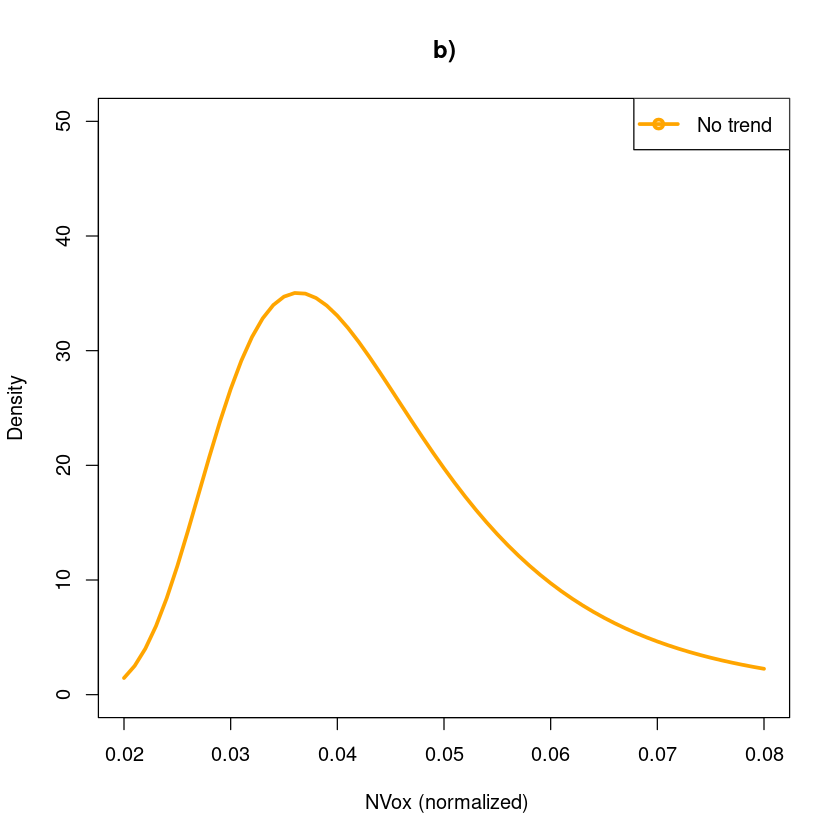

In [51]:
par(mfrow=c(1,1))
xt <- seq(from=0.02,to=0.08,by=0.001)
xd1 <- devd(xt,loc=ci_h0[1,2],scale=ci_h0[2,2],shape=ci_h0[3,2],type="GEV")
#xd2 <- devd(xt,loc=ci_loctr[1,2]+ci_loctr[2,2]*102,scale=ci_loctr[3,2],shape=ci_loctr[4,2],type="GEV")
plot(xt,xd1,type="l",lwd=3,xlab=" NVox (normalized)",ylab="Density",col="orange",ylim=c(0,50),main="b)")
#lines(xt,xd1,type="l",lwd=3,col="red")
labels <- c('No trend')#,"2018")
colors <- c("orange","red")
legend("topright",labels,pch=c(1,1),lwd=c(3,3),col=colors)
#arrows(22.2, 0.42, 23.8, 0.42,lwd=3,lty=6)

### Trend fit

In [63]:
fit_loctr <- fevd(extreme_norm, data_detrend, location.fun = ~Trend, units = "Vox")
#ci_loctr <- ci(fit_loctr,type="parameter")

In [64]:
fit_loctr


fevd(x = extreme_norm, data = data_detrend, location.fun = ~Trend, 
    units = "Vox")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -108.5672 


 Estimated parameters:
          mu0           mu1         scale         shape 
 0.0317249034  0.0003664036  0.0111719533 -0.0445808079 

 AIC = -209.1345 

 BIC = -202.6908 

In [65]:
lr.test(fit_loctr, fit_h0)


	Likelihood-ratio Test

data:  extreme_normextreme_norm
Likelihood-ratio = 2.235, chi-square critical value = 3.8415, alpha =
0.0500, Degrees of Freedom = 1.0000, p-value = 0.1349
alternative hypothesis: greater
